Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

Import the csv file

In [2]:
df = pd.read_csv("fitness_data.csv")

Data processing (Checking and replacing the missing values )

In [3]:
print(df.isnull().sum()) #printing out all the missing values

Age                              10
Gender                           71
Weight (kg)                      22
Height (m)                       26
Max_BPM                          21
Avg_BPM                          30
Resting_BPM                      19
Session_Duration (hours)         23
Calories_Burned                  23
Workout_Type                     61
Fat_Percentage                   16
Water_Intake (liters)            24
Workout_Frequency (days/week)    58
Experience_Level                 57
BMI                              30
dtype: int64


In [4]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)



In [5]:
print(df.isnull().sum()) #printing out all the missing values

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64


Handling Max_BPM specifically remove the \t and convert them to numeric

In [ ]:
print("Missing values in 'Max_BPM':", df['Max_BPM'].isnull().sum())
# Remove tab characters
# df['Max_BPM'] = df['Max_BPM'].str.replace('\t', '', regex=False)
# Convert Max_BPM to string type
df['Max_BPM'] = df['Max_BPM'].astype(str)

# Then use the .str.replace() method to remove tabs
df['Max_BPM'] = df['Max_BPM'].str.replace('\t', '', regex=False)

# Check the cleaned column
print(df['Max_BPM'].head())




df['Max_BPM'] = pd.to_numeric(df['Max_BPM'], errors='coerce')
# Calculate the median (ignoring NaN values)
median_value = df['Max_BPM'].median()

# Fill missing values with the median
df['Max_BPM'].fillna(median_value, inplace=True)

Replacing missing values for all features.

In [ ]:
# Replacing missing gender with the most frequent gender
mode_gender = df['Gender'].mode()[0]
df['Gender'].fillna(mode_gender, inplace=True)
print(df['Gender'].isnull().sum()) #check whether if it is replaced

#Replacing age with medain
med_age = df['Age'].median()
df['Age'].fillna(med_age, inplace=True)

# Impute numerical features with median
for col in ['Weight (kg)', 'Height (m)', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'BMI']:
    df[col].fillna(df[col].median(), inplace=True)


# Impute categorical features with mode
for col in ['Workout_Type', 'Experience_Level']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Recalculate BMI
df['BMI'] = df['Weight (kg)'] / (df['Height (m)'] ** 2)

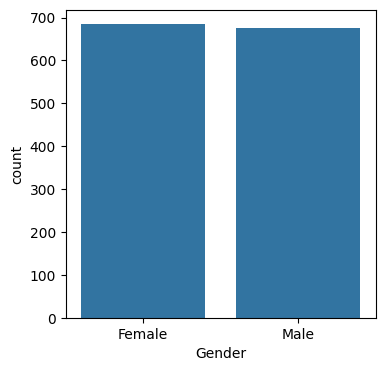

In [7]:
import seaborn as sns
plt.figure(figsize=(4,4))
sns.countplot(x= 'Gender',data=df)
plt.show()

In [7]:
from scipy import stats  
import numpy as np  

# z_scores = np.abs(stats.zscore(df['Weight (kg)']))  
# outliers = df[z_scores > 3]  
# print(f"Outliers in Weight: {len(outliers)}")  

for col in ['Weight (kg)','Height (m)','Calories_Burned','Fat_Percentage','Water_Intake (liters)']:
    z_scores = np.abs(stats.zscore(df[col]))
    outliers = df[z_scores>3]
    print(f"Outliers in {col}: {len(outliers)}")



Outliers in Weight (kg): 12
Outliers in Height (m): 0
Outliers in Calories_Burned: 0
Outliers in Fat_Percentage: 0
Outliers in Water_Intake (liters): 0


# Need to be fix

In [10]:
# Step 1: Detect and remove outliers in Weight
z_scores = np.abs(stats.zscore(df['Weight (kg)']))
df = df[z_scores < 3].reset_index(drop=True)  # Drop outliers and reset index

# Step 2: Recalculate Z-scores after dropping outliers
z_scores_after =np.abs(stats.zscore(df['Weight (kg)']))
outliers_after = (z_scores_after >= 3).sum()

print(f"Outliers for weight after dropping: {outliers_after}")  # Should be 0

Outliers for weight after dropping: 0


# Use label encoder to convert male and female to numerical values.

In [11]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Check correlation between features


                                    Age    Gender  Weight (kg)  Height (m)  \
Age                            1.000000  0.062395     0.000445   -0.049332   
Gender                         0.062395  1.000000     0.027269   -0.035257   
Weight (kg)                    0.000445  0.027269     1.000000   -0.063982   
Height (m)                    -0.049332 -0.035257    -0.063982    1.000000   
Max_BPM                       -0.006772  0.033164     0.000855    0.016054   
Avg_BPM                        0.000949  0.043192     0.046260   -0.050351   
Resting_BPM                    0.018727  0.082753    -0.026698   -0.011418   
Session_Duration (hours)       0.018636  0.023044     0.004533    0.013509   
Calories_Burned               -0.017121 -0.066349    -0.010701    0.000747   
Fat_Percentage                -0.038041 -0.003808     0.015485   -0.039302   
Water_Intake (liters)         -0.060891  0.011422    -0.007881   -0.039742   
Workout_Frequency (days/week)  0.041165  0.046366    -0.039333  

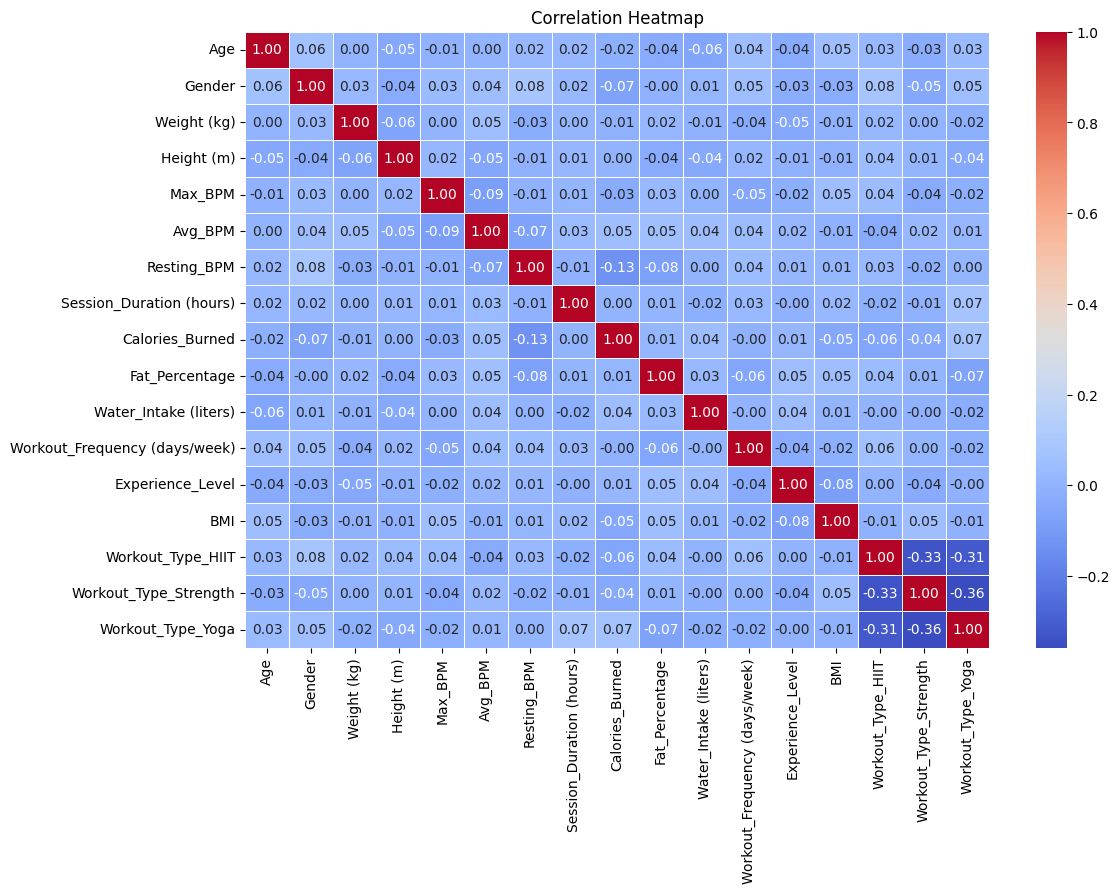

In [12]:
import seaborn as sns

# One-hot encode the 'Workout_Type' column
df = pd.get_dummies(df, columns=['Workout_Type'], drop_first=True)

# Now you can compute the correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Standardize numerical variables

In [13]:
from sklearn.preprocessing import StandardScaler

# Define numerical features (excluding target variable)
numerical_features = [
    "Age", "Weight (kg)", "Height (m)", "Max_BPM", "Avg_BPM", "Resting_BPM",
    "Session_Duration (hours)", "Fat_Percentage", "Water_Intake (liters)",
    "Workout_Frequency (days/week)", "BMI"
]

# Standardize numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df["Calories_Burned"] = scaler.fit_transform(df[["Calories_Burned"]])


## Splitting Data for training

In [ ]:
from sklearn.model_selection import train_test_split

# Features (X) and target variable (y)
X = df.drop(columns=["Calories_Burned"])  # Drop the target column
y = df["Calories_Burned"]  # Target variable

# Split into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(1075, 16) (269, 16) (1075,) (269,)


# Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared Score: {r2}")


Mean Absolute Error: 0.7937384318883988
R-squared Score: -0.0425148210941777


# XGBoost

In [17]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Train XGBoost model
model = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared Score: {r2}")


Mean Absolute Error: 0.8372470233263452
R-squared Score: -0.13660763586338343


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Calories_Burned'] = scaler.fit_transform(df[['Calories_Burned']])


# DNN

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X = df.drop(columns=['Calories_Burned']).values  # Drop target column
y = df['Calories_Burned'].values.reshape(-1, 1)  # Reshape to 2D

# Split into train and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


class CaloriesDNN(nn.Module):
    def __init__(self, input_size):
        super(CaloriesDNN, self).__init__()
        self.layer1 = nn.Linear(input_size, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 16)
        self.output = nn.Linear(16, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = self.output(x)  # No activation for regression
        return x
    
    def predict(self, X):
        self.eval()  # Set the model to evaluation mode
        with torch.no_grad():  # Disable gradient computation
            return self(X).detach().numpy() 

# Initialize model
input_size = X_train.shape[1]  # Number of features
model = CaloriesDNN(input_size)

criterion = nn.MSELoss()  # Mean Squared Error for regression
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# Number of epochs
epochs = 100

for epoch in range(epochs):
    # Forward pass
    predictions = model(X_train_tensor)
    loss = criterion(predictions, y_train_tensor)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:  # Print every 10 epochs
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

with torch.no_grad():  # Disable gradient computation
    test_predictions = model(X_test_tensor)
    test_loss = criterion(test_predictions, y_test_tensor)

print(f"Test Loss (MSE): {test_loss.item():.4f}")

y_pred = model(X_test_tensor).detach().numpy()


In [ ]:
# Assuming 'model' is the trained model
predictions = model.predict(X_test)
from sklearn.metrics import mean_squared_error

test_loss = mean_squared_error(y_test, predictions)
print(f"Test Loss (MSE): {test_loss}")
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print(f"R² Score: {r2}")
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae}")


AttributeError: 'CaloriesDNN' object has no attribute 'predict'